<a href="https://colab.research.google.com/github/shanxar/Numpy_Pandas/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING KAGGLE DATASET OF TITANIC PASSENGERS AND ANALYZE FACTORRS THAT AFFCTED THE SURVIVAL

In [47]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#Load csv to dataframe
df=pd.read_csv('train.csv')
print(f" Dataframe \n {df[:20]}\n")
print("INFO\n")
print(f"{df.info()}\n")
print("DESCRIBE\n")
print(df.describe)

#No of missing values in Age

print("\n\n No of missing values in Age \n")
print(df['Age'].isnull().sum())

#mean filling in the missing Age values
df['Age']=df['Age'].fillna(df['Age'].mean())

#Check No of missing values in Age again

print("\n\n No of missing values in Age \n")
print(df['Age'].isnull().sum())


df.drop('Cabin',axis=1,inplace=True)  #Drop Cabin column
print('Cabin' in df.columns) #Check if 'Cabin' column is present



 Dataframe 
     PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...


Survival rate based on Gender

TOTAL COUNT OF MALE AND FEMALE 
 Sex
male      577
female    314
Name: count, dtype: int64

SURVIVED COUNT BASED ON GENDER 
 Sex
female    233
male      109
Name: Survived, dtype: int64
SURVIVED RATE BASED ON GENDER 
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 PLOT SURVIVAL RATE BASED ON GENDER 



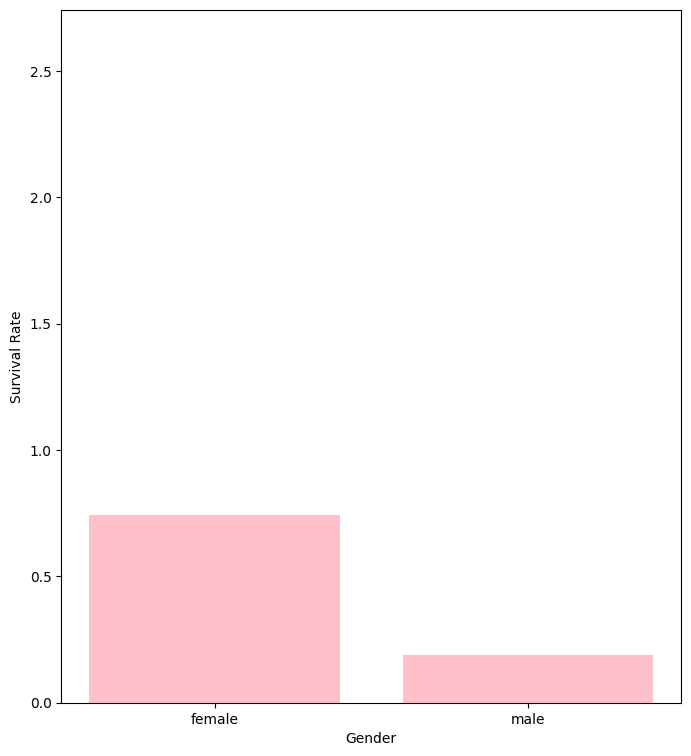

In [49]:

#Group by gender with values of survived

print("\nSurvival rate based on Gender")

print(f"\nTOTAL COUNT OF MALE AND FEMALE \n {df['Sex'].value_counts()}\n") #Count of male and female in Sex columns

gender_survived = df.groupby('Sex')['Survived'].sum()
print(f"SURVIVED COUNT BASED ON GENDER \n {gender_survived}")

gender_survived = df.groupby('Sex')['Survived'].mean()
print(f"SURVIVED RATE BASED ON GENDER \n {gender_survived}")

print("\n PLOT SURVIVAL RATE BASED ON GENDER \n")

plt.figure(figsize=(8,9))
plt.bar(gender_survived.index,gender_survived.values,color="pink")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.ylim(0,(gender_survived.values.max()+2))
plt.show()


Survival Analysis  by Age


SURVIVAL RATE : [np.float64(0.5), np.float64(0.4), np.float64(0.4), np.float64(0.23)]


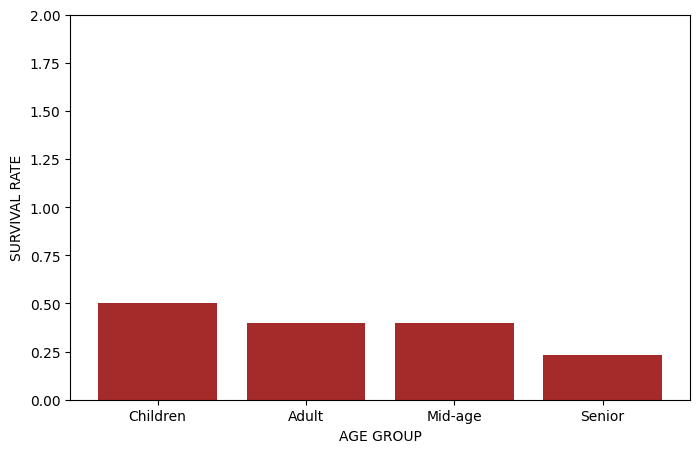

In [50]:





#Analyze which age range survived more
#<= 18 ,19 to 40 ,41 to 60 , above 60

print(f"Survival Analysis  by Age\n")
age_group=["Children","Adult","Mid-age","Senior"]

children=df[df['Age']<=18]
adult=df[(df['Age']>18) & (df['Age']<=40)]
mid_age=df[(df['Age']>40) & (df['Age']<=60)]
senior=df[df['Age']>60]

survival_rates=[round(children['Survived'].mean(),1),
                round(adult['Survived'].mean(),1),
                round(mid_age['Survived'].mean(),1),
                round(senior['Survived'].mean(),2)
                ]
print(f"\nSURVIVAL RATE : {survival_rates}")

#PLOTTING

plt.figure(figsize=(8,5))
plt.bar(age_group,survival_rates,color='brown')
plt.xlabel('AGE GROUP')
plt.ylabel("SURVIVAL RATE")
plt.ylim(0,2)
plt.show()
